In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# %% [markdown]

 **1. Data Loading and Cleaning**

In [ ]:
# %%

# Load the dataset
data = pd.read_csv('data/solar_232215.csv', delimiter=',', decimal='.')
# Delete unnecessary columns if they exist
data.drop(['modified1', 'modified2', 'modified3'],
          axis=1, inplace=True, errors='ignore')
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
data.set_index('timestamp', inplace=True)

# Display the first few rows of the data
data.head()

# Extract the solar output column
raw = data['raw']

data

,raw,temperature
timestamp,,
2021-02-02 00:00:00,0.0,-3.9
2021-02-02 01:00:00,0.0,-3.5
2021-02-02 02:00:00,0.0,-3.0
2021-02-02 03:00:00,0.0,-2.6
2021-02-02 04:00:00,0.0,-2.4
...,...,...
2023-02-01 19:00:00,0.0,0.0
2023-02-01 20:00:00,0.0,0.1
2023-02-01 21:00:00,0.0,0.1


# %% [markdown]

 **2. Additive Classical Decomposition with Multiple Periods**


Decomposition with period: 24 hours


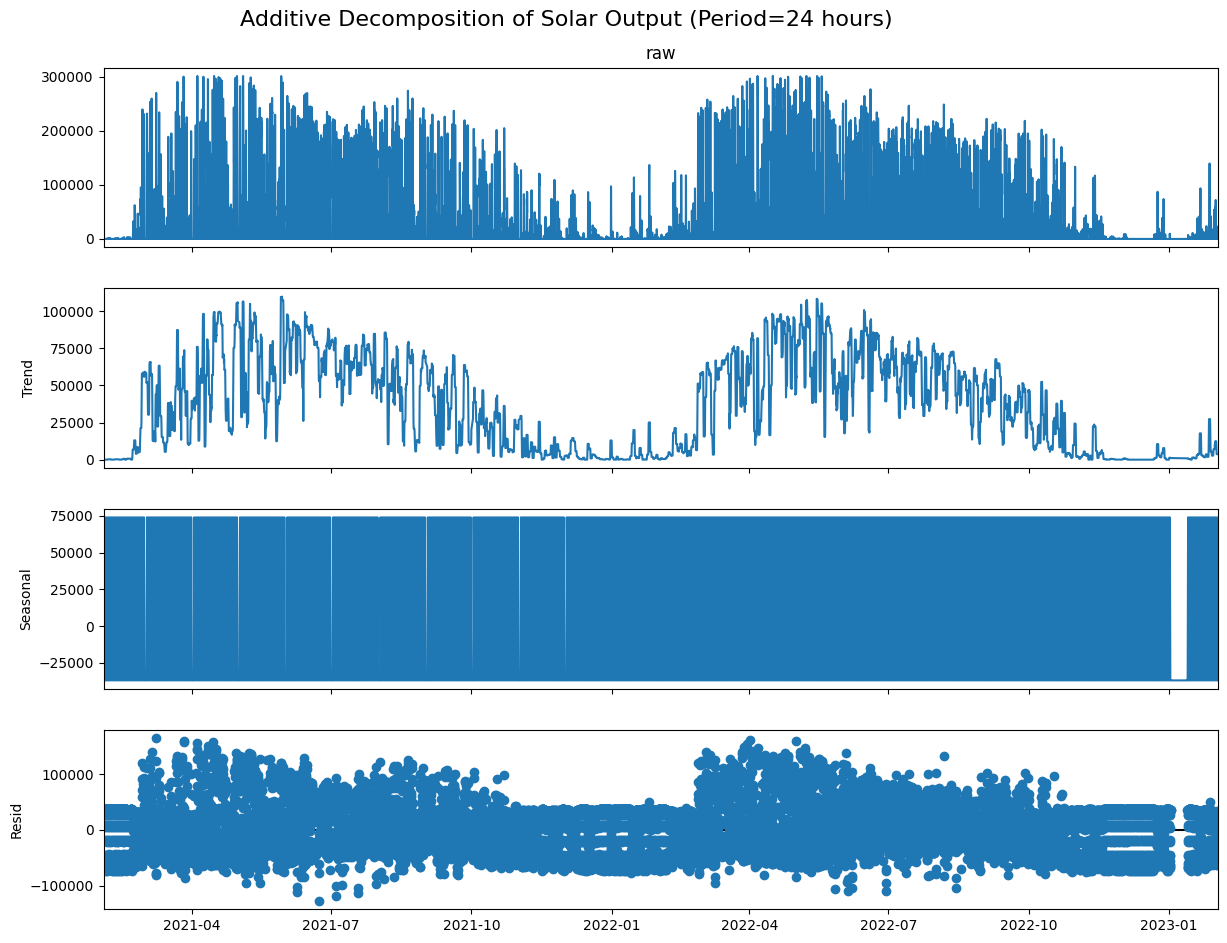


Decomposition with period: 168 hours


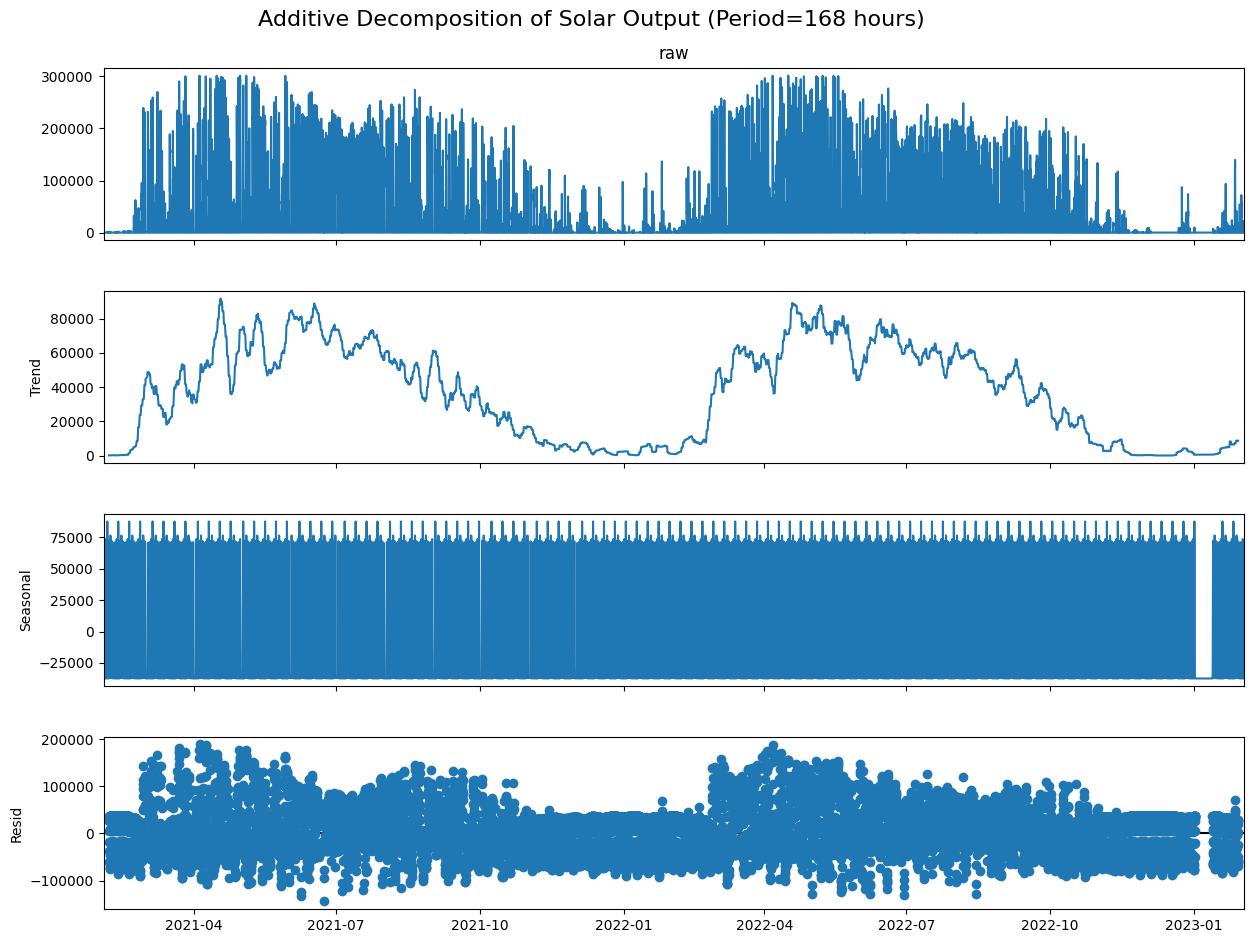


Decomposition with period: 720 hours


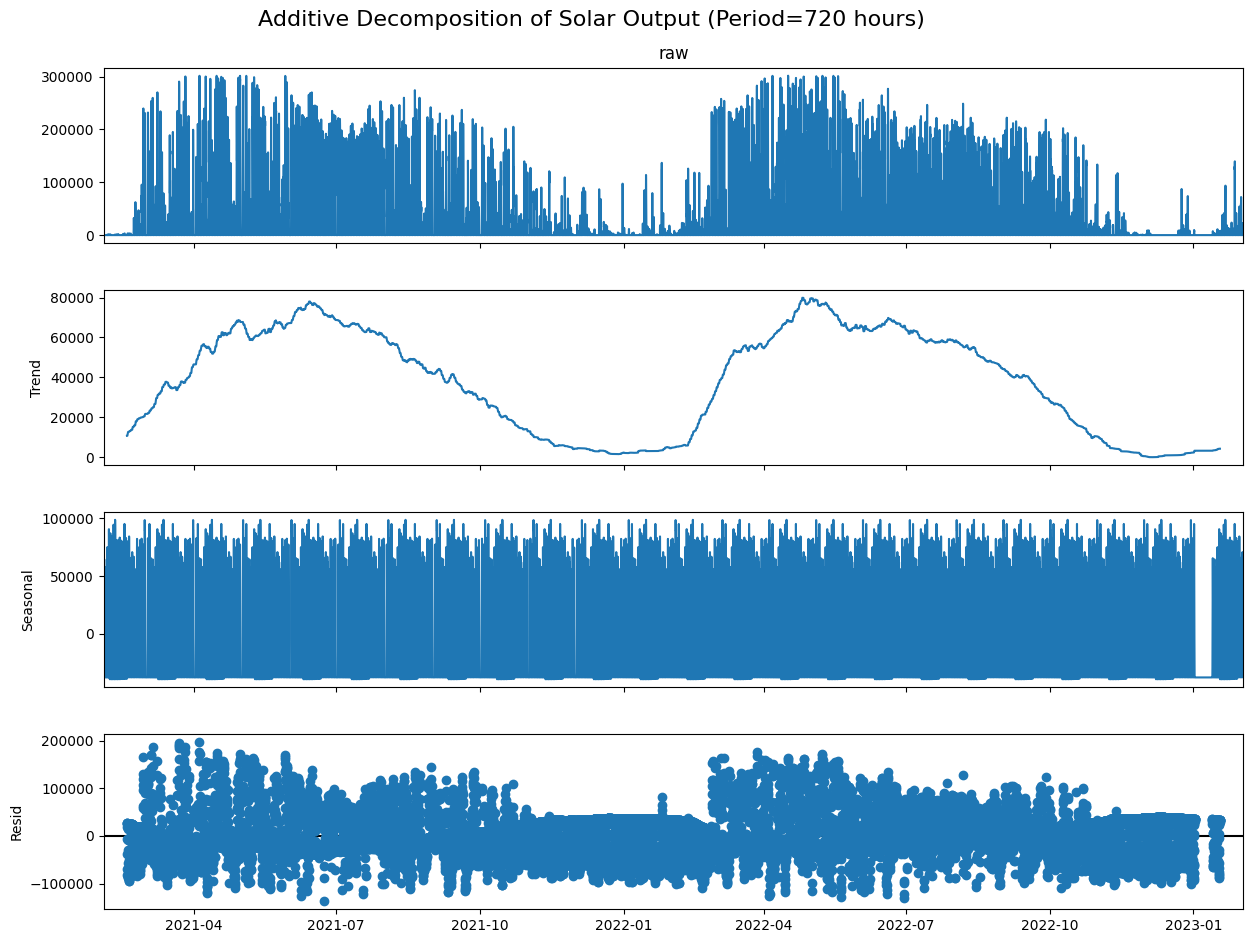

In [ ]:
# %%

# Testing decomposition with different periods to find the optimal one for solar generation
# 24 hours (daily), 168 hours (weekly), and 720 hours (monthly)
periods = [24, 168, 720]
decomposition_results = {}

for period in periods:
    print(f"\nDecomposition with period: {period} hours")
    decomposition = seasonal_decompose(
        raw, model='additive', period=period)
    decomposition_results[period] = decomposition

    # Plot the decomposition components
    fig = decomposition.plot()
    fig.set_size_inches(14, 10)
    plt.suptitle(
        f'Additive Decomposition of Solar Output (Period={period} hours)', fontsize=16)
    plt.show()

# %% [markdown]

 **3. Comparison of Decomposition Periods**

In [ ]:
# %%

# Analyze each period's effectiveness in capturing solar generation patterns

print("Comparing decomposition periods for solar generation insights:")

for period, decomposition in decomposition_results.items():
    # Calculate variance explained by the seasonal component for each period
    seasonal_variance = decomposition.seasonal.var()
    residual_variance = decomposition.resid.var()
    explained_ratio = seasonal_variance / \
        (seasonal_variance + residual_variance)

    print(f"Period {period} hours:")
    print(f" - Seasonal Variance: {seasonal_variance:.2f}")
    print(f" - Residual Variance: {residual_variance:.2f}")
    print(f" - Seasonal Variance Explained Ratio: {explained_ratio:.2%}\n")

# The period with the highest seasonal variance explained ratio is considered optimal
optimal_period = max(decomposition_results, key=lambda p: decomposition_results[p].seasonal.var(
) / (decomposition_results[p].seasonal.var() + decomposition_results[p].resid.var()))

print(
    f"The optimal decomposition period for solar generation analysis is {optimal_period} hours.")

Comparing decomposition periods for solar generation insights:
Period 24 hours:
 - Seasonal Variance: 1842630016.38
 - Residual Variance: 1638419875.77
 - Seasonal Variance Explained Ratio: 52.93%

Period 168 hours:
 - Seasonal Variance: 1877705376.41
 - Residual Variance: 1866758981.66
 - Seasonal Variance Explained Ratio: 50.15%

Period 720 hours:
 - Seasonal Variance: 2039561752.20
 - Residual Variance: 1904444605.99
 - Seasonal Variance Explained Ratio: 51.71%

The optimal decomposition period for solar generation analysis is 24 hours.


# %% [markdown]

 **4. Description of Decomposition Components for Optimal Period**

In [ ]:
# %%

# Display components for the optimal period

optimal_decomposition = decomposition_results[optimal_period]

print("Observed Component (Optimal Period):")
display(optimal_decomposition.observed.head())

print("\nTrend Component (Optimal Period):")
display(optimal_decomposition.trend.head())

print("\nSeasonal Component (Optimal Period):")
# Displaying a full day's seasonality if period=24
display(optimal_decomposition.seasonal.head(25))

print("\nResidual Component (Optimal Period):")
display(optimal_decomposition.resid.head())

Observed Component (Optimal Period):


timestamp
2021-02-02 00:00:00    0.0
2021-02-02 01:00:00    0.0
2021-02-02 02:00:00    0.0
2021-02-02 03:00:00    0.0
2021-02-02 04:00:00    0.0
Name: raw, dtype: float64


Trend Component (Optimal Period):


timestamp
2021-02-02 00:00:00   NaN
2021-02-02 01:00:00   NaN
2021-02-02 02:00:00   NaN
2021-02-02 03:00:00   NaN
2021-02-02 04:00:00   NaN
Name: trend, dtype: float64


Seasonal Component (Optimal Period):


timestamp
2021-02-02 00:00:00   -36965.416451
2021-02-02 01:00:00   -36965.677387
2021-02-02 02:00:00   -36765.418610
2021-02-02 03:00:00   -34753.304942
2021-02-02 04:00:00   -28130.686665
2021-02-02 05:00:00    -9197.399391
2021-02-02 06:00:00    17672.570693
2021-02-02 07:00:00    46369.674917
2021-02-02 08:00:00    62218.806527
2021-02-02 09:00:00    71872.656880
2021-02-02 10:00:00    74030.860750
2021-02-02 11:00:00    69848.786979
2021-02-02 12:00:00    61805.069201
2021-02-02 13:00:00    44234.328467
2021-02-02 14:00:00    20891.308425
2021-02-02 15:00:00    -5213.503863
2021-02-02 16:00:00   -27001.598750
2021-02-02 17:00:00   -33313.722423
2021-02-02 18:00:00   -35898.089894
2021-02-02 19:00:00   -36885.207674
2021-02-02 20:00:00   -36961.831489
2021-02-02 21:00:00   -36963.062630
2021-02-02 22:00:00   -36964.189067
2021-02-02 23:00:00   -36964.953600
2021-02-03 00:00:00   -36965.416451
Name: seasonal, dtype: float64


Residual Component (Optimal Period):


timestamp
2021-02-02 00:00:00   NaN
2021-02-02 01:00:00   NaN
2021-02-02 02:00:00   NaN
2021-02-02 03:00:00   NaN
2021-02-02 04:00:00   NaN
Name: resid, dtype: float64

# %% [markdown]

 **5. Creation of Typical Generation Profiles**

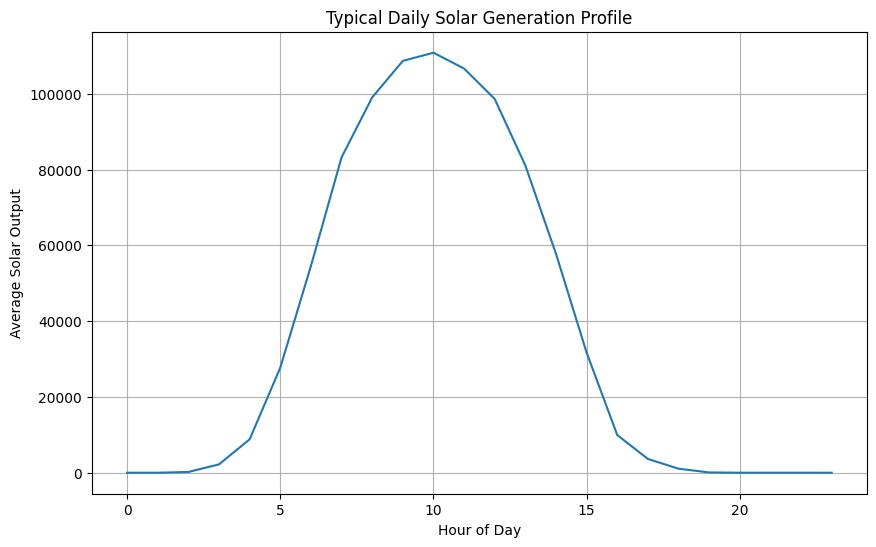

In [ ]:
# %%

# Extract hour, month, and season for profiling
data['hour'] = data.index.hour
data['month'] = data.index.month

# Define function to assign seasons based on month


def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'


data['season'] = data['month'].apply(get_season)

# Ensure the raw column is correctly named
solar_column = 'raw'  # Replace with actual column name if different

# Calculate and plot the typical daily profile
hourly_profile = data.groupby('hour')[solar_column].mean()
plt.figure(figsize=(10, 6))
hourly_profile.plot()
plt.title('Typical Daily Solar Generation Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Average Solar Output')
plt.grid(True)
plt.show()

# %% [markdown]

 **6. Monthly Profile of Solar Output**

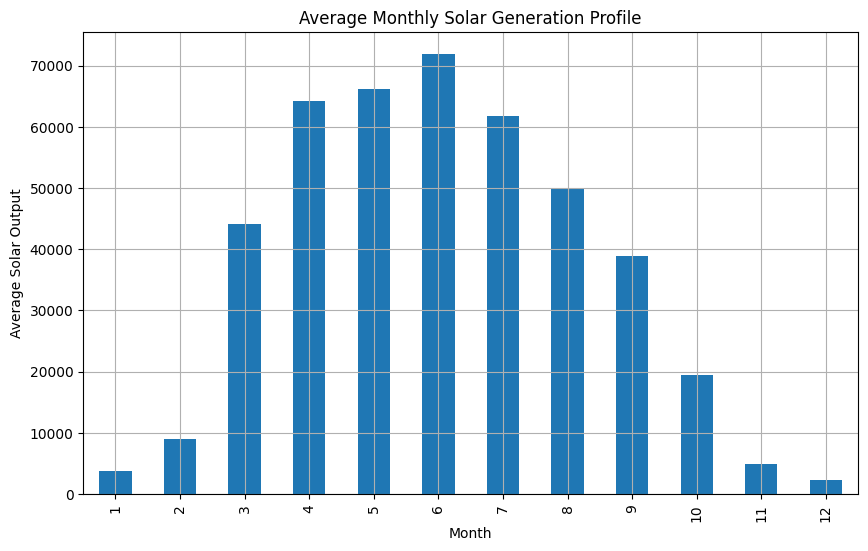

In [ ]:
# %%

# Calculate average solar output for each month and plot
monthly_profile = data.groupby('month')[solar_column].mean()
plt.figure(figsize=(10, 6))
monthly_profile.plot(kind='bar')
plt.title('Average Monthly Solar Generation Profile')
plt.xlabel('Month')
plt.ylabel('Average Solar Output')
plt.grid(True)
plt.show()

# %% [markdown]

 **7. Seasonal Hourly Profiles**

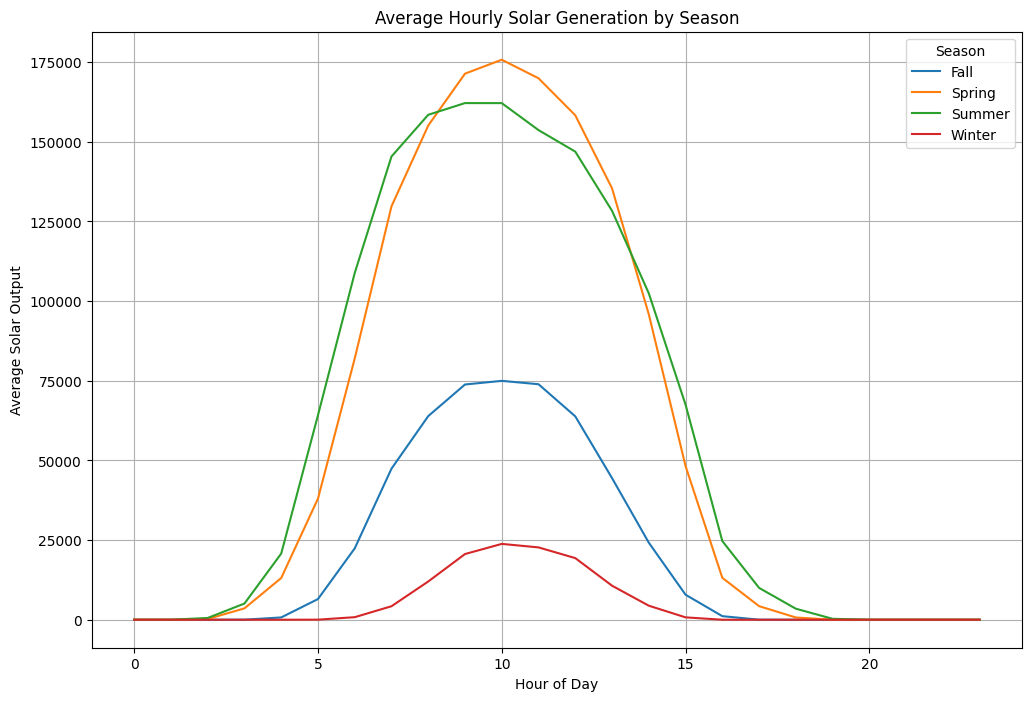

In [ ]:
# %%

# Calculate and plot average hourly solar output for each season
seasonal_profiles = data.groupby(['season', 'hour'])[
    solar_column].mean().unstack('season')
seasonal_profiles.plot(figsize=(12, 8))
plt.title('Average Hourly Solar Generation by Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Solar Output')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# %% [markdown]

 **8. Methodology Explanation**

# %% [markdown]

 **Methodology Explanation:**

 *Additive Classical Decomposition with Multiple Periods:*
 - Tested decomposition with daily (24 hours), weekly (168 hours), and monthly (720 hours) periods.
 - Optimal period selected based on the highest ratio of variance explained by the seasonal component.

 *Typical Generation Profiles:*
 - **Hourly Profile:** Averages solar output at each hour across days for typical daily pattern.
 - **Monthly Profile:** Averages solar output by month to observe annual variation.
 - **Seasonal Profiles:** Uses seasonal grouping for average hourly output per season.

 **Rationale:**
 - Understanding these patterns aids in energy production forecasting and optimization.
 - Facilitates planning for storage and grid management.

# %% [markdown]

 ### Summary and Conclusion
 - **Optimal Decomposition Period:** The optimal period selected for decomposition (24 hours) captures the cyclical nature of solar generation effectively.
 - **Profile Analysis:** Created to understand daily, monthly, and seasonal solar patterns.
 **Additional Notes:**
 Replace `'raw'` with the actual column name if different.
 Libraries needed: `pandas`, `matplotlib`, `statsmodels`, `numpy`.